<ul>
<li>
TF is yet another high level framework for ML based on Python and C.<br>
You can easily conduct CPU/GPU Matrix (Tensor) operations with TensorFlow.
</li>
<li>
Its design philosiphy baseed on dataflow slightly differs from conventional sequential programming.
See the doc [https://www.tensorflow.org/programmers_guide/graphs]
</li>
<pre>
###   Ref: 
###   TF getting-started:  https://www.tensorflow.org/get_started/
###   A new toturial: https://www.tensorflow.org/get_started/eager
###
</pre>    
</ul>

In [1]:
###
###  First, check your TF version and the hardware enviorment
###
import tensorflow as tf
from tensorflow.python.client import device_lib

print ("Using Tensorflow: ", tf.__version__)
print ( device_lib.list_local_devices() )


/home/lincy/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


('Using Tensorflow: ', '1.6.0')
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7063701006166604387
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5906890752
locality {
  bus_id: 1
}
incarnation: 8515760502983218261
physical_device_desc: "device: 0, name: GeForce GTX 1060 6GB, pci bus id: 0000:03:00.0, compute capability: 6.1"
, name: "/device:GPU:1"
device_type: "GPU"
memory_limit: 5908004864
locality {
  bus_id: 2
}
incarnation: 9346572367854910590
physical_device_desc: "device: 1, name: GeForce GTX 1060 6GB, pci bus id: 0000:84:00.0, compute capability: 6.1"
]


In [3]:
### First, check GPU status if you have a GPU 
!nvidia-smi

Wed May 30 23:50:28 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 390.30                 Driver Version: 390.30                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 106...  Off  | 00000000:03:00.0 Off |                  N/A |
| 28%   29C    P2    28W / 120W |   5779MiB /  6078MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 106...  Off  | 00000000:84:00.0 Off |                  N/A |
| 28%   29C    P2    27W / 120W |   5780MiB /  6078MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
        

In [1]:
###
### Variables, Constant, Placeholders
###
import tensorflow as tf
tf.reset_default_graph()

## create a variable of rank-3 zero tensor  
# GraphKeys can be such as:
#   GLOBAL_VARIABLES
#   LOCAL_VARIABLES
#   TRAINABLE_VARIABLES, or control by "trainable=False"
#
var = tf.get_variable("var", shape=[2, 3], dtype=tf.float32, 
         initializer=tf.zeros_initializer, collections=[tf.GraphKeys.LOCAL_VARIABLES])

with tf.variable_scope("ABC"):
    a = tf.add(3, 5)
    a = tf.cast(a, tf.float32) 

sess = tf.Session()
sess.run(tf.global_variables_initializer())
print (sess.run(a) )
print (sess.run( tf.sin(a) ))

sess.run(tf.local_variables_initializer())
var = (var + 1.0 )*5
print (sess.run(var))



sess.close()


/home/lincy/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


8.0
0.98935825
[[5. 5. 5.]
 [5. 5. 5.]]


In [5]:
### For advanced feature, we can specify which device to be used. 
### This is only for futher development of distributed training.
###
### We can program TF just like a complex MPI program with C.
###  
import tensorflow as tf
from tensorflow.python.client import device_lib

# Creates a graph.
with tf.device('/gpu:0'):
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2,3],name='a')
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3,2],name='b')
    c = tf.matmul(a, b)

sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
print (sess.run(c) )

[[22. 28.]
 [49. 64.]]


In [2]:
###
###  Build a simple a perceptron model -- logistic regression (sigmoid)
###
import tensorflow as tf
tf.reset_default_graph()

IN_DIM = 3
OUT_DIM = 1
x = tf.placeholder(tf.float32, [None, IN_DIM])
y = tf.placeholder(tf.float32, [None, OUT_DIM])

W  = tf.Variable(tf.zeros([IN_DIM, OUT_DIM]), name="W")
b  = tf.Variable(tf.zeros([OUT_DIM]),         name="b")

output  = tf.sigmoid(tf.matmul(x, W) + b)

xdata = [  [1.,2.,3.],
           [1.,2.,3.]   ]  ## input data with batch size = 2
#xdata2 = tf.ones_like(xdata)



with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    out = sess.run([output], feed_dict={x: xdata}  )   #  2 outputs 
    print (out)

[array([[0.5],
       [0.5]], dtype=float32)]


<Figure size 432x288 with 0 Axes>

New data, epoch 0
Step 0 Loss 0.70756453


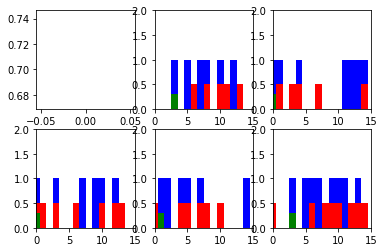

In [ ]:




"""
from __future__ import print_function, division
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline


num_epochs = 50
total_series_length = 50000
truncated_backprop_length = 15
state_size = 4
num_classes = 2
echo_step = 3
batch_size = 5
num_batches = total_series_length//batch_size//truncated_backprop_length

def generateData():
    x = np.array(np.random.choice(2, total_series_length, p=[0.5, 0.5]))
    y = np.roll(x, echo_step)
    y[0:echo_step] = 0

    x = x.reshape((batch_size, -1))  # The first index changing slowest, subseries as rows
    y = y.reshape((batch_size, -1))

    return (x, y)


batchX_placeholder = tf.placeholder(tf.float32, [batch_size, truncated_backprop_length])
batchY_placeholder = tf.placeholder(tf.int32, [batch_size, truncated_backprop_length])
init_state = tf.placeholder(tf.float32, [batch_size, state_size])


W = tf.Variable(np.random.rand(state_size+1, state_size), dtype=tf.float32)
b = tf.Variable(np.zeros((1,state_size)), dtype=tf.float32)
W2 = tf.Variable(np.random.rand(state_size, num_classes),dtype=tf.float32)
b2 = tf.Variable(np.zeros((1,num_classes)), dtype=tf.float32)

# Unpack columns
inputs_series = tf.unstack(batchX_placeholder, axis=1)
labels_series = tf.unstack(batchY_placeholder, axis=1)


# Forward pass
current_state = init_state
states_series = []
for current_input in inputs_series:
    current_input = tf.reshape(current_input, [batch_size, 1])
    input_and_state_concatenated = tf.concat([current_input, current_state],1)  # Increasing number of columns

    next_state = tf.tanh(tf.matmul(input_and_state_concatenated, W) + b)  # Broadcasted addition
    states_series.append(next_state)
    current_state = next_state

    

logits_series = [tf.matmul(state, W2) + b2 for state in states_series] #Broadcasted addition
predictions_series = [tf.nn.softmax(logits) for logits in logits_series]

losses = [tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels) for logits, labels in zip(logits_series,labels_series)]
total_loss = tf.reduce_mean(losses)

train_step = tf.train.AdagradOptimizer(0.3).minimize(total_loss)


def plot(loss_list, predictions_series, batchX, batchY):
    plt.subplot(2, 3, 1)
    plt.cla()
    plt.plot(loss_list)

    for batch_series_idx in range(5):
        one_hot_output_series = np.array(predictions_series)[:, batch_series_idx, :]
        single_output_series = np.array([(1 if out[0] < 0.5 else 0) for out in one_hot_output_series])

        plt.subplot(2, 3, batch_series_idx + 2)
        plt.cla()
        plt.axis([0, truncated_backprop_length, 0, 2])
        left_offset = range(truncated_backprop_length)
        plt.bar(left_offset, batchX[batch_series_idx, :], width=1, color="blue")
        plt.bar(left_offset, batchY[batch_series_idx, :] * 0.5, width=1, color="red")
        plt.bar(left_offset, single_output_series * 0.3, width=1, color="green")

    plt.draw()
    plt.pause(0.0001)
    

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    plt.ion()
    plt.figure()
    plt.show()
    loss_list = []

    for epoch_idx in range(num_epochs):
        x,y = generateData()
        _current_state = np.zeros((batch_size, state_size))

        print("New data, epoch", epoch_idx)

        for batch_idx in range(num_batches):
            start_idx = batch_idx * truncated_backprop_length
            end_idx = start_idx + truncated_backprop_length

            batchX = x[:,start_idx:end_idx]
            batchY = y[:,start_idx:end_idx]

            _total_loss, _train_step, _current_state, _predictions_series = sess.run(
                [total_loss, train_step, current_state, predictions_series],
                feed_dict={
                    batchX_placeholder:batchX,
                    batchY_placeholder:batchY,
                    init_state:_current_state
                })

            loss_list.append(_total_loss)

            if batch_idx%100 == 0:
                print("Step",batch_idx, "Loss", _total_loss)
                plot(loss_list, _predictions_series, batchX, batchY)

plt.ioff()
plt.show()
"""